In [ ]:
# @ ElsaTH

In [48]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import requests
import json

In [49]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37189,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37190,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37191,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37192,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data2 = data.loc[:,["location","date","new_cases"]]
data2

,location,date,new_cases
0,Afghanistan,2019-12-31,0.0
1,Afghanistan,2020-01-01,0.0
2,Afghanistan,2020-01-02,0.0
3,Afghanistan,2020-01-03,0.0
4,Afghanistan,2020-01-04,0.0
...,...,...,...
37189,International,2020-02-28,0.0
37190,International,2020-02-29,0.0
37191,International,2020-03-01,0.0
37192,International,2020-03-02,0.0


In [51]:
data2.set_index(["location"],inplace=True)

In [52]:
data2 = data2.loc[["Russia"],:].dropna()
data2

,date,new_cases
location,,
Russia,2019-12-31,0.0
Russia,2020-01-01,0.0
Russia,2020-01-02,0.0
Russia,2020-01-03,0.0
Russia,2020-01-04,0.0
...,...,...
Russia,2020-08-12,4945.0
Russia,2020-08-13,5102.0
Russia,2020-08-14,5057.0


In [53]:
data2.reset_index(inplace=True)
data2

,location,date,new_cases
0,Russia,2019-12-31,0.0
1,Russia,2020-01-01,0.0
2,Russia,2020-01-02,0.0
3,Russia,2020-01-03,0.0
4,Russia,2020-01-04,0.0
...,...,...,...
225,Russia,2020-08-12,4945.0
226,Russia,2020-08-13,5102.0
227,Russia,2020-08-14,5057.0
228,Russia,2020-08-15,5065.0


In [54]:
data2.set_index("date", inplace=True)
data2

,location,new_cases
date,,
2019-12-31,Russia,0.0
2020-01-01,Russia,0.0
2020-01-02,Russia,0.0
2020-01-03,Russia,0.0
2020-01-04,Russia,0.0
...,...,...
2020-08-12,Russia,4945.0
2020-08-13,Russia,5102.0
2020-08-14,Russia,5057.0


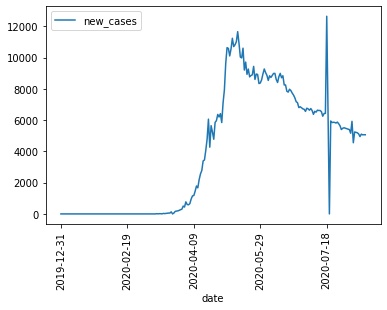

In [58]:
data2.plot(rot=90)

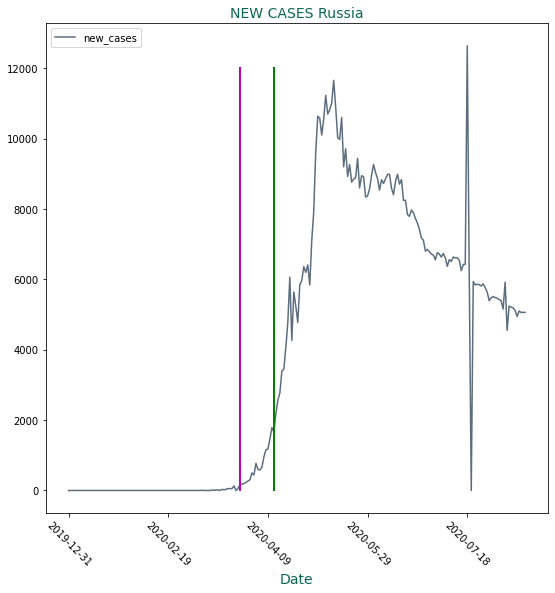

In [63]:
data2.plot(figsize=(9,9), rot=-45, color="#5D6D7E")
plt.xlabel("Date", size=14, color="#0E6655")
plt.plot([86,86],[0,12000],'k-', lw=2, color="m")
plt.plot([103,103],[0,12000],'k-', lw=2, color="g")
plt.title("NEW CASES Russia", size=14, color="#0E6655")
plt.savefig('new_cases_russia.png')


Observación de outliers

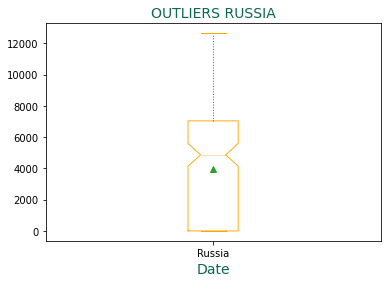

In [64]:
plt.boxplot(data2.new_cases,
            notch=True, patch_artist=None,
            capprops=dict(color="orange",markerfacecolor='g'),
            medianprops=dict(color="orange", alpha=0.3),
            whiskerprops=dict(color="green",alpha=0.9, markersize=17,linestyle = 'dotted'),
            flierprops=dict(color="#52BE80 ",alpha=0.9, markersize=5,markerfacecolor="#5D6D7E", marker='o'),
            boxprops=dict(color="orange",alpha=0.9, markersize=5),
            showmeans=dict(color="green",alpha=0.9, markersize=5),
            showfliers=dict(color="green",alpha=0.9, markersize=5),
            showbox=dict(color="green",alpha=0.9, markersize=5),
            showcaps=dict(color="green",alpha=0.9, markersize=5)
          )
        
plt.title("OUTLIERS RUSSIA",size=14, color="#0E6655")
plt.xticks([1], ['Russia'])
plt.xlabel("Date", size=14, color="#0E6655")
plt.savefig('outliers_russia.png')
plt.show()

In [ ]:
Se observa que no existen outliers para este país.